## Download the cable dataset 

First, I import pandas and geopandas to use the power of pandas to geospatial data.

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import LineString
import matplotlib.pyplot as plt

Then I paste the url from the github page to download my first cable dataset.

In [2]:
fname = "https://raw.githubusercontent.com/telegeography/www.submarinecablemap.com/master/public/api/v2/cable/cable-geo.json"
df = gpd.read_file(fname, geometry='geometry')
print(type(df))
df.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


,color,slug,geometry
0,4d50a2,acs-alaska-oregon-network-akorn,(LINESTRING (-151.291670394858 60.689928950949...
1,09addc,aden-djibouti,(LINESTRING (43.1479928876509 11.5948813293645...
2,66b646,adria-1,(LINESTRING (19.9195913741185 39.6195333476856...
3,933d97,aeconnect-1,(LINESTRING (-9.23214578701738 54.207114982820...
4,8dc740,africa-coast-to-europe-ace,(LINESTRING (6.30006977231538 2.36791255870535...


I want to rename the "slug" column as "id" and I want "id" to be df index.

In [3]:
df = df.rename(columns={'slug':'id'})
df = df.set_index('id')
df.head()

,color,geometry
id,,
acs-alaska-oregon-network-akorn,4d50a2,(LINESTRING (-151.291670394858 60.689928950949...
aden-djibouti,09addc,(LINESTRING (43.1479928876509 11.5948813293645...
adria-1,66b646,(LINESTRING (19.9195913741185 39.6195333476856...
aeconnect-1,933d97,(LINESTRING (-9.23214578701738 54.207114982820...
africa-coast-to-europe-ace,8dc740,(LINESTRING (6.30006977231538 2.36791255870535...


Now, I want to download my second cable dataset and give the same index as the previous one. 

In [4]:
data = gpd.GeoDataFrame()

for x in df.index:
    url = 'https://raw.githubusercontent.com/telegeography/www.submarinecablemap.com/master/public/api/v2/cable/'+x+'.json'
    DF = gpd.GeoDataFrame(pd.read_json(url))
    #DF = pd.DataFrame(pd.read_json(url))
    data = pd.concat([data, DF])

In [5]:
data.head()

,id,name,cable_id,landing_points,length,rfs,owners,url,notes
0,acs-alaska-oregon-network-akorn,ACS Alaska-Oregon Network (AKORN),1571,"{'landing_point_id': 4067, 'id': 'anchorage-ak...","3,000 km",2009 April,Alaska Communications,https://www.alaskacommunications.com,NaN
1,acs-alaska-oregon-network-akorn,ACS Alaska-Oregon Network (AKORN),1571,"{'landing_point_id': 8539, 'id': 'florence-or-...","3,000 km",2009 April,Alaska Communications,https://www.alaskacommunications.com,NaN
2,acs-alaska-oregon-network-akorn,ACS Alaska-Oregon Network (AKORN),1571,"{'landing_point_id': 8392, 'id': 'homer-ak-uni...","3,000 km",2009 April,Alaska Communications,https://www.alaskacommunications.com,NaN
3,acs-alaska-oregon-network-akorn,ACS Alaska-Oregon Network (AKORN),1571,"{'landing_point_id': 8540, 'id': 'nikiski-ak-u...","3,000 km",2009 April,Alaska Communications,https://www.alaskacommunications.com,NaN
0,aden-djibouti,Aden-Djibouti,1307,"{'landing_point_id': 5969, 'id': 'aden-yemen',...",269 km,1994,"Djibouti Telecom, TeleYemen, Tata Communicat...",http://www.teleyemen.com.ye,NaN


In [6]:
data = data.set_index('id')
data.head()

,name,cable_id,landing_points,length,rfs,owners,url,notes
id,,,,,,,,
acs-alaska-oregon-network-akorn,ACS Alaska-Oregon Network (AKORN),1571,"{'landing_point_id': 4067, 'id': 'anchorage-ak...","3,000 km",2009 April,Alaska Communications,https://www.alaskacommunications.com,NaN
acs-alaska-oregon-network-akorn,ACS Alaska-Oregon Network (AKORN),1571,"{'landing_point_id': 8539, 'id': 'florence-or-...","3,000 km",2009 April,Alaska Communications,https://www.alaskacommunications.com,NaN
acs-alaska-oregon-network-akorn,ACS Alaska-Oregon Network (AKORN),1571,"{'landing_point_id': 8392, 'id': 'homer-ak-uni...","3,000 km",2009 April,Alaska Communications,https://www.alaskacommunications.com,NaN
acs-alaska-oregon-network-akorn,ACS Alaska-Oregon Network (AKORN),1571,"{'landing_point_id': 8540, 'id': 'nikiski-ak-u...","3,000 km",2009 April,Alaska Communications,https://www.alaskacommunications.com,NaN
aden-djibouti,Aden-Djibouti,1307,"{'landing_point_id': 5969, 'id': 'aden-yemen',...",269 km,1994,"Djibouti Telecom, TeleYemen, Tata Communicat...",http://www.teleyemen.com.ye,NaN


## Clean my dataset

First, I join my two datasets using their common index.

In [7]:
final_df = data.join(df)

Thn, I re-index the resulting dataset and I delete the unnecessary columns.

In [8]:
final_df = final_df.set_index('cable_id')
final_df = final_df.drop(columns=['url', 'notes', 'color', 'landing_points'])
final_df.head()

,name,length,rfs,owners,geometry
cable_id,,,,,
1571,ACS Alaska-Oregon Network (AKORN),"3,000 km",2009 April,Alaska Communications,(LINESTRING (-151.291670394858 60.689928950949...
1571,ACS Alaska-Oregon Network (AKORN),"3,000 km",2009 April,Alaska Communications,(LINESTRING (-151.291670394858 60.689928950949...
1571,ACS Alaska-Oregon Network (AKORN),"3,000 km",2009 April,Alaska Communications,(LINESTRING (-151.291670394858 60.689928950949...
1571,ACS Alaska-Oregon Network (AKORN),"3,000 km",2009 April,Alaska Communications,(LINESTRING (-151.291670394858 60.689928950949...
1307,Aden-Djibouti,269 km,1994,"Djibouti Telecom, TeleYemen, Tata Communicat...",(LINESTRING (43.1479928876509 11.5948813293645...


Then I delete the month of the rfs column. 

In [9]:
final_df['RFS'] = final_df['rfs'].str.split(' ').str.get(0)
final_df = final_df.drop(columns=['rfs'])
final_df.head()

,name,length,owners,geometry,RFS
cable_id,,,,,
1571,ACS Alaska-Oregon Network (AKORN),"3,000 km",Alaska Communications,(LINESTRING (-151.291670394858 60.689928950949...,2009
1571,ACS Alaska-Oregon Network (AKORN),"3,000 km",Alaska Communications,(LINESTRING (-151.291670394858 60.689928950949...,2009
1571,ACS Alaska-Oregon Network (AKORN),"3,000 km",Alaska Communications,(LINESTRING (-151.291670394858 60.689928950949...,2009
1571,ACS Alaska-Oregon Network (AKORN),"3,000 km",Alaska Communications,(LINESTRING (-151.291670394858 60.689928950949...,2009
1307,Aden-Djibouti,269 km,"Djibouti Telecom, TeleYemen, Tata Communicat...",(LINESTRING (43.1479928876509 11.5948813293645...,NaN


Now, I want to convert the length from string to float.

In [10]:
final_df['length_km'] = final_df['length'].str.split(' ').str.get(0)
final_df = final_df.drop(columns=['length'])
final_df.length_km = final_df.length_km.replace(',', '')
final_df.length_km[final_df.length_km == 'n.a.'] = None
#final_df.length_km = final_df.length_km.astype(float)

In [11]:
#pd.to_numeric(final_df.length_km)
#import locale
#from locale import atof
#locale.setlocale(locale.LC_NUMERIC, '')
#final_df['length_km'].applymap(atof)
#final_df.head()

In [12]:
final_df = final_df.rename(columns={'geometry':'path'})
geo_final_df = gpd.GeoDataFrame(final_df, geometry='path')
geo_final_df.set_geometry('path')

,name,owners,path,RFS,length_km
cable_id,,,,,
1571,ACS Alaska-Oregon Network (AKORN),Alaska Communications,(LINESTRING (-151.291670394858 60.689928950949...,2009,"3,000"
1571,ACS Alaska-Oregon Network (AKORN),Alaska Communications,(LINESTRING (-151.291670394858 60.689928950949...,2009,"3,000"
1571,ACS Alaska-Oregon Network (AKORN),Alaska Communications,(LINESTRING (-151.291670394858 60.689928950949...,2009,"3,000"
1571,ACS Alaska-Oregon Network (AKORN),Alaska Communications,(LINESTRING (-151.291670394858 60.689928950949...,2009,"3,000"
1307,Aden-Djibouti,"Djibouti Telecom, TeleYemen, Tata Communicat...",(LINESTRING (43.1479928876509 11.5948813293645...,NaN,269
1307,Aden-Djibouti,"Djibouti Telecom, TeleYemen, Tata Communicat...",(LINESTRING (43.1479928876509 11.5948813293645...,NaN,269
1317,Adria-1,"T-Hrvatski Telekom, Albania Telecom",(LINESTRING (19.9195913741185 39.6195333476856...,1996,440
1317,Adria-1,"T-Hrvatski Telekom, Albania Telecom",(LINESTRING (19.9195913741185 39.6195333476856...,1996,440
1317,Adria-1,"T-Hrvatski Telekom, Albania Telecom",(LINESTRING (19.9195913741185 39.6195333476856...,1996,440


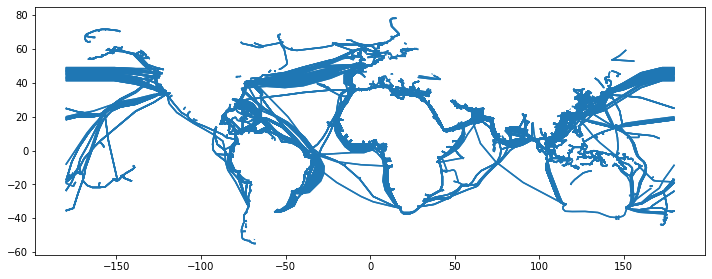

In [13]:
geo_final_df.plot(figsize=(12,6))